In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
from pylab import mpl,rcParams
import statsmodels.api as sm
import lightgbm as lgb
import xgboost as xgb
from sklearn import preprocessing
from sklearn import svm 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
plt.style.use('fivethirtyeight')
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('风电能量数据.CSV',parse_dates=['Datetime'])
df = data[['Datetime','Power(MW)']][660:670].rename(columns={'Datetime':'ds','Power(MW)':'y'})

In [234]:
# mean = df['y'].mean()
# std = df['y'].std()
# df['y'] = (df['y']-df['y'].mean())/df['y'].std()

In [15]:
model = Prophet(changepoint_prior_scale=0.05)
model.fit(df)
future = model.make_future_dataframe(periods=7,freq='B')
forecast = model.predict(future)

11:38:58 - cmdstanpy - INFO - Chain [1] start processing
11:38:58 - cmdstanpy - INFO - Chain [1] done processing


In [236]:
# forecast[['ds','yhat']].tail(30)

In [237]:
# res = forecast[['ds','yhat']].copy()
# # res = (res['yhat']*std+mean)
# res.tail(31)

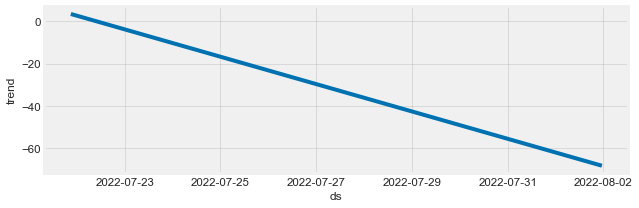

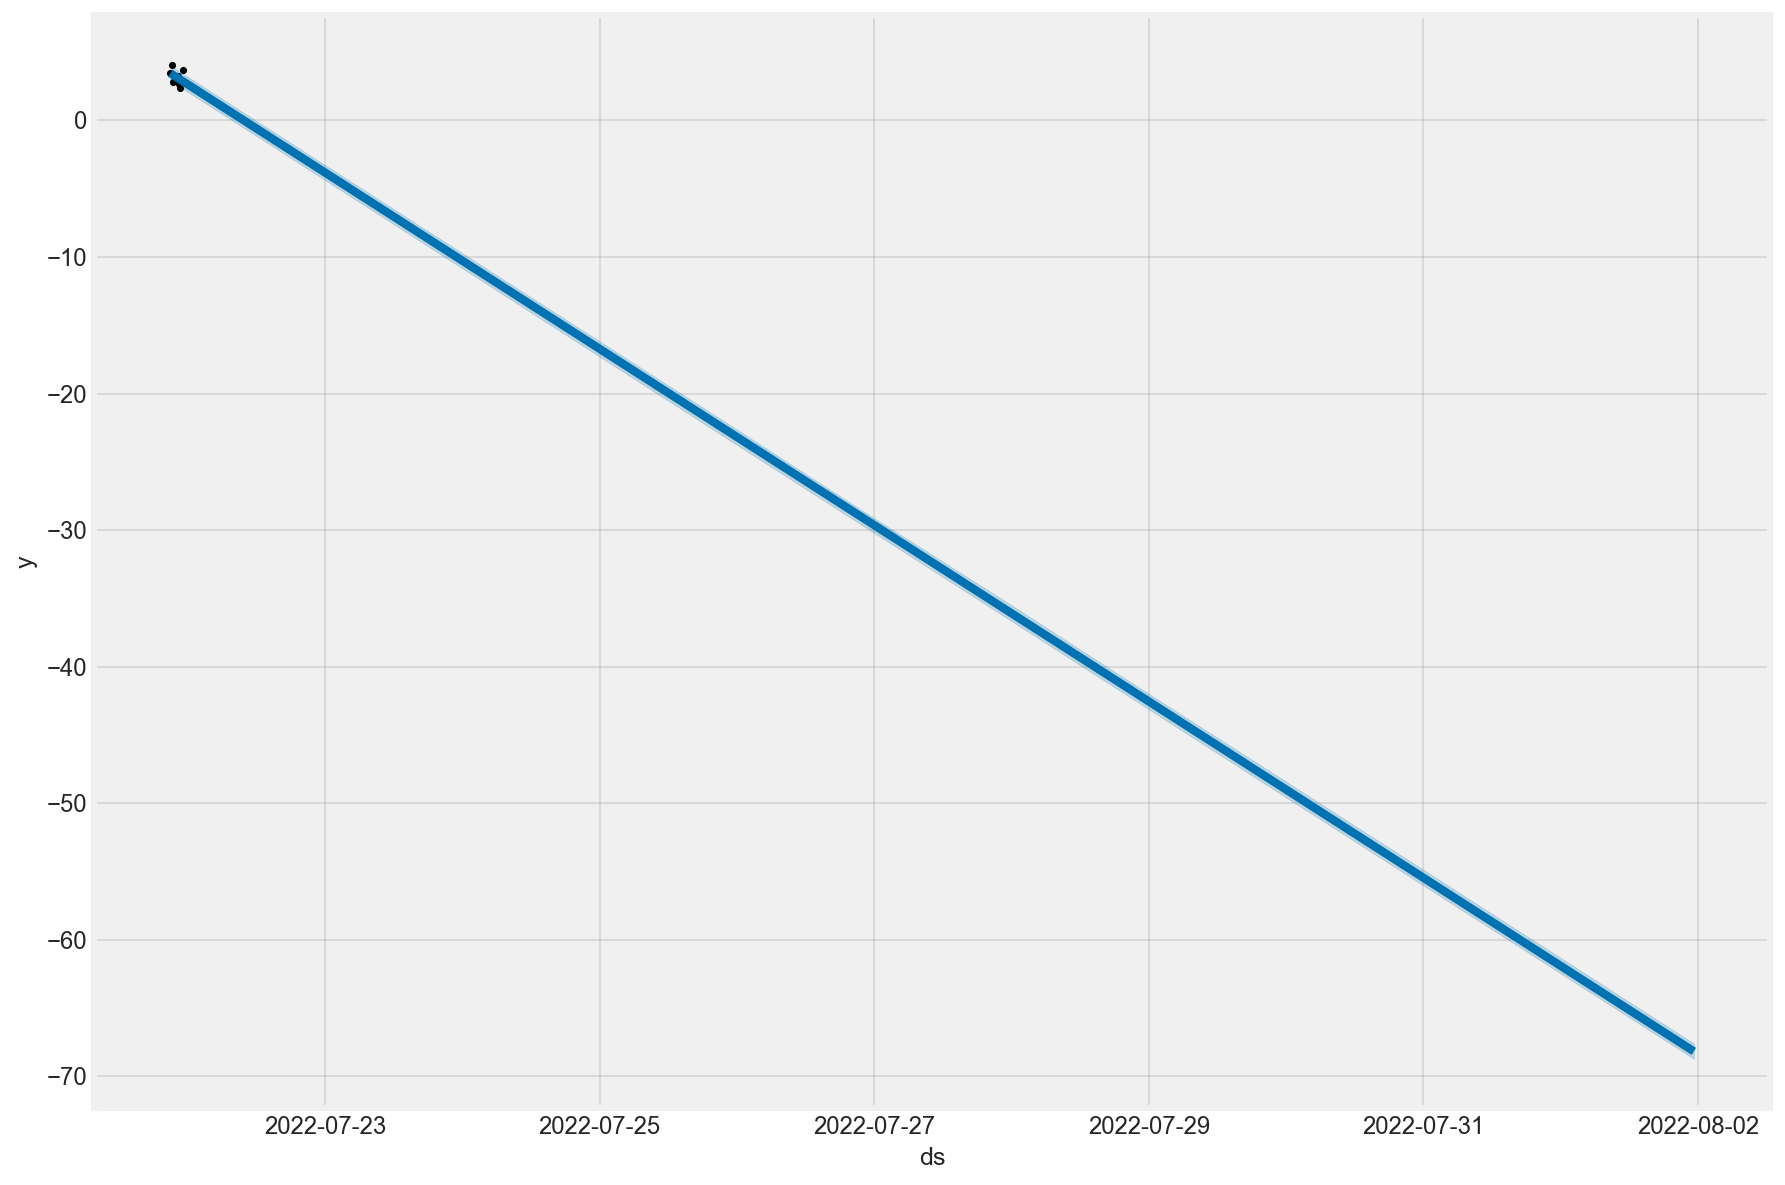

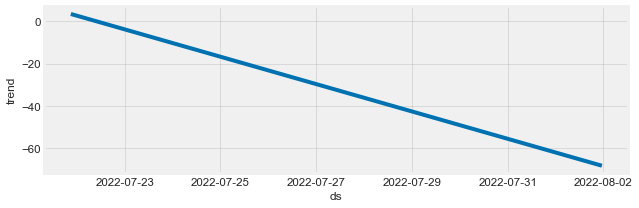

In [16]:
fig = plt.figure(figsize=(12,8),dpi=150)
ax = fig.add_subplot(111)
model.plot(forecast,ax=ax)
model.plot_components(forecast)

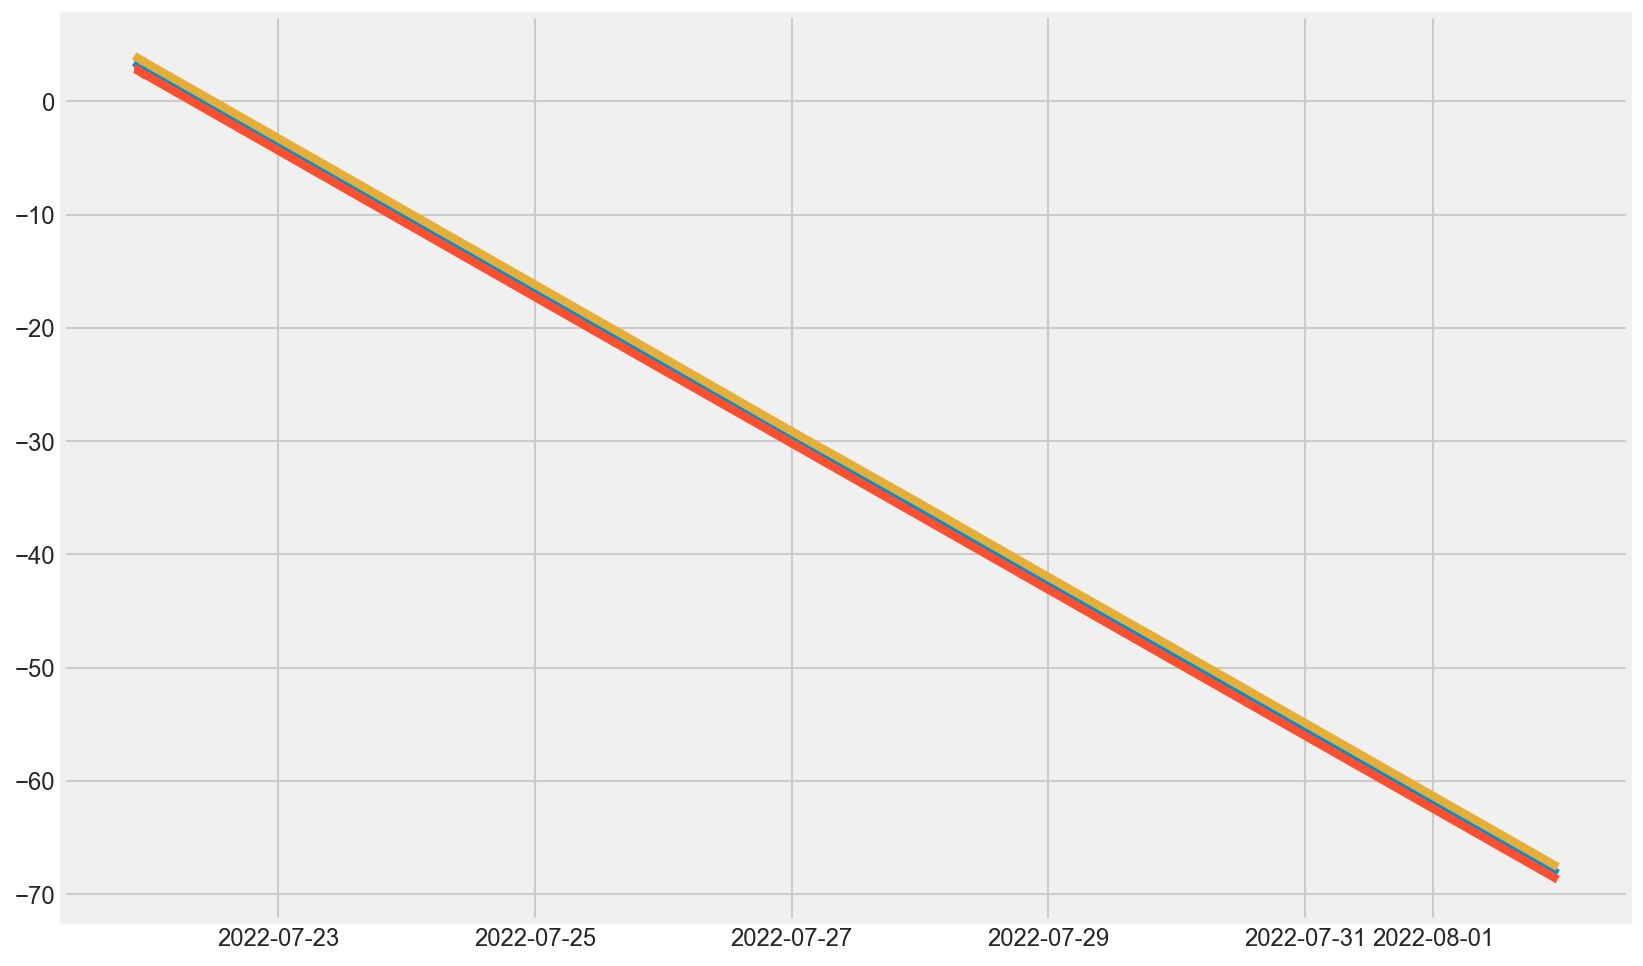

In [17]:
fig = plt.figure(figsize=(12,8),dpi=150)
x1 = forecast['ds']
y1 = forecast['yhat']
y2 = forecast['yhat_lower']
y3 = forecast['yhat_upper']
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.show()

In [204]:
# from fbprophet.plot import add_changepoints_to_plot
# fig = model.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
np.random.seed(7)

df = pd.read_csv('风电.CSV')
df.head()


,Datetime,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity,Power(MW)
0,2022-06-13 \t00:00:00,0.0,6.9614,14.8148,27.32,998.67,92.59,0.0
1,2022-06-13 \t00:15:00,0.0,7.0349,15.1623,27.33,998.68,92.40,0.0
2,2022-06-13 \t00:30:00,0.0,7.1234,14.3874,27.31,998.54,92.42,0.0
3,2022-06-13 \t00:45:00,0.0,7.2816,15.6968,27.29,998.21,92.27,0.0
4,2022-06-13 \t01:00:00,0.0,7.2544,18.7347,27.34,997.92,91.92,0.0


In [3]:
df  = df.rename(columns={'Datetime':'date'})
df


,date,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity,Power(MW)
0,2022-06-13 \t00:00:00,0.0,6.9614,14.8148,27.32,998.67,92.59,0.0
1,2022-06-13 \t00:15:00,0.0,7.0349,15.1623,27.33,998.68,92.40,0.0
2,2022-06-13 \t00:30:00,0.0,7.1234,14.3874,27.31,998.54,92.42,0.0
3,2022-06-13 \t00:45:00,0.0,7.2816,15.6968,27.29,998.21,92.27,0.0
4,2022-06-13 \t01:00:00,0.0,7.2544,18.7347,27.34,997.92,91.92,0.0
...,...,...,...,...,...,...,...,...
667,2022-06-19 \t22:45:00,0.0,8.8735,7.3813,27.97,997.04,91.88,0.0
668,2022-06-19 \t23:00:00,0.0,7.6355,357.8234,27.16,996.98,0.00,0.0
669,2022-06-19 \t23:15:00,0.0,7.0539,352.9153,27.19,997.26,0.00,0.0
670,2022-06-19 \t23:30:00,0.0,6.7206,350.5797,27.27,997.28,0.00,0.0


In [4]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'])
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})


,date,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity,Power(MW)
0,2022-06-13 00:00:00,0.000000,6.961400,14.814800,27.320000,998.670000,92.590000,0.000000
1,2022-06-13 00:15:00,0.000000,7.034900,15.162300,27.330000,998.680000,92.400000,0.000000
2,2022-06-13 00:30:00,0.000000,7.123400,14.387400,27.310000,998.540000,92.420000,0.000000
3,2022-06-13 00:45:00,0.000000,7.281600,15.696800,27.290000,998.210000,92.270000,0.000000
4,2022-06-13 01:00:00,0.000000,7.254400,18.734700,27.340000,997.920000,91.920000,0.000000


In [5]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()


,date,delta
0,2022-06-13 00:00:00,NaT
1,2022-06-13 00:15:00,0 days 00:15:00
2,2022-06-13 00:30:00,0 days 00:15:00
3,2022-06-13 00:45:00,0 days 00:15:00
4,2022-06-13 01:00:00,0 days 00:15:00


In [6]:
df['delta'].sum(), df['delta'].count()


(Timedelta('6 days 23:45:00'), 671)

In [7]:
df = df.drop('delta', axis=1)
df.isna().sum()


date           0
Irradiance     0
Speed10        0
Direction10    0
Temper         0
Pressure       0
Humidity       0
Power(MW)      0
dtype: int64

In [8]:
df.columns


Index(['date', 'Irradiance', 'Speed10', 'Direction10', 'Temper', 'Pressure',
       'Humidity', 'Power(MW)'],
      dtype='object')

In [9]:
feature_columns = [
     'Irradiance', 'Speed10', 'Direction10', 'Temper', 'Pressure', 'Humidity'
]
target_column = ['Power(MW)']

train_size = int(0.85 * len(df))

multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,1,2,3,5,6]]), pd.DataFrame(multivariate_df.iloc[:train_size, 7])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,1,2,3,5,6]]), pd.DataFrame(multivariate_df.iloc[train_size:, 7])

train.head()


,ds,y,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity
0,2022-06-13 00:00:00,0.0,0.0,6.9614,14.8148,27.32,998.67,92.59
1,2022-06-13 00:15:00,0.0,0.0,7.0349,15.1623,27.33,998.68,92.40
2,2022-06-13 00:30:00,0.0,0.0,7.1234,14.3874,27.31,998.54,92.42
3,2022-06-13 00:45:00,0.0,0.0,7.2816,15.6968,27.29,998.21,92.27
4,2022-06-13 01:00:00,0.0,0.0,7.2544,18.7347,27.34,997.92,91.92


In [10]:
train  =multivariate_df.iloc[:train_size, :]
train


,ds,y,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity
0,2022-06-13 00:00:00,0.0,0.0,6.9614,14.8148,27.32,998.67,92.59
1,2022-06-13 00:15:00,0.0,0.0,7.0349,15.1623,27.33,998.68,92.40
2,2022-06-13 00:30:00,0.0,0.0,7.1234,14.3874,27.31,998.54,92.42
3,2022-06-13 00:45:00,0.0,0.0,7.2816,15.6968,27.29,998.21,92.27
4,2022-06-13 01:00:00,0.0,0.0,7.2544,18.7347,27.34,997.92,91.92
...,...,...,...,...,...,...,...,...
566,2022-06-18 21:30:00,0.0,0.0,9.6847,8.4313,27.68,997.51,91.16
567,2022-06-18 21:45:00,0.0,0.0,9.6975,8.5395,27.67,997.52,91.24
568,2022-06-18 22:00:00,0.0,0.0,9.6539,7.5593,27.66,997.57,91.38
569,2022-06-18 22:15:00,0.0,0.0,9.5086,6.8858,27.65,997.65,91.53


In [11]:
from prophet import Prophet


# Train the model
model = Prophet()
# model.add_regressor('最高温度')
# model.add_regressor('最低温度')
# model.add_regressor('白天风力风向')
# model.add_regressor('夜晚风力风向')
# model.add_regressor('天气1')
# model.add_regressor('天气2')
# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RMSE: 71.74611387052539


In [12]:
from sklearn.metrics import r2_score
print('R2-score:',r2_score(y_valid, y_pred['yhat']))


R2-score: -7.538659961920361


KeyError: 'y'

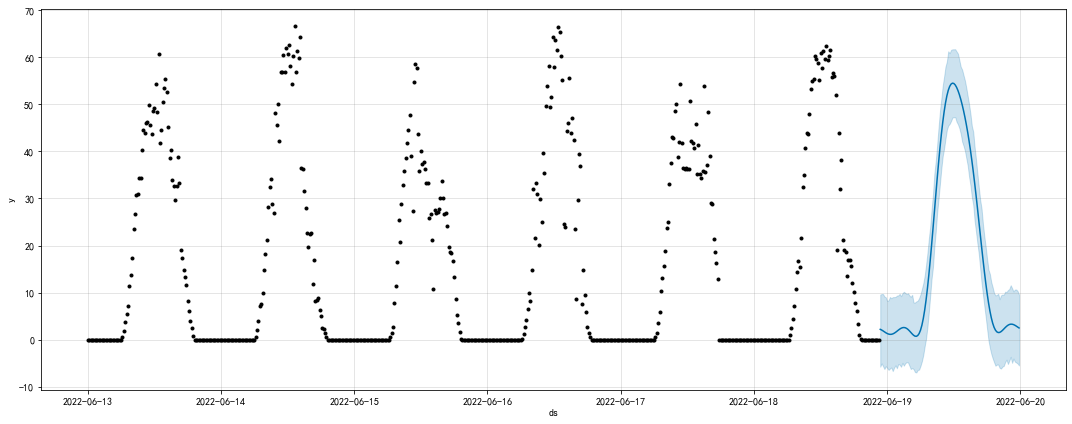

In [19]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=10)
ax.set_xlabel(xlabel='date', fontsize=10)
ax.set_ylabel(ylabel='Power(MW)', fontsize=10)

plt.show()
